In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = '../data/cat_dog/train'

## directory 생성 ##

base_dir = '../data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


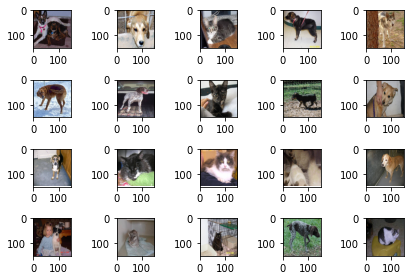

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_small/train'              # cats 폴더, dogs 폴더
valid_dir = '../data/cat_dog_small/validation'         # 

# ImageDataGenerator를 생성해요!
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()

##################################################  1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'
                ))


##################################################  3
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  4
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'
                ))

model.add(MaxPooling2D(pool_size=(2,2)))



### feature extraction ###

model.add(Flatten())   #  4차원 데이터를 2차원으로!

model.add(Dense(units=256,            # hidden layer 넣어줘버리기~
                activation='relu'))

model.add(Dense(units=1,                # output layer 넣어줘버리기~
                activation='sigmoid'))  # 확률값 알아야하니까 sigmoid

print(model.summary())   # model 정보 요약해서 봐보자

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

2022-04-20 10:04:14.803337: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-20 10:04:14.803557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-20 10:04:14.803753: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
### optimizer 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,   # train_generator 요기에 있는 데이터로 학습하겠어!!
                                       # 2000의 이미지를 20개씩 다 뽑으려면, 100번을 뽑아야함
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)   # 1000의 이미지를 20개씩 다 뽑으려면, 50번을 뽑아야함

model.save('../data/cats_dogs_small_cnn_model.h5')

Epoch 1/30
100/100 [==============================] - 177s 2s/step - loss: 0.6898 - accuracy: 0.5341 - val_loss: 0.6593 - val_accuracy: 0.6040
Epoch 2/30
100/100 [==============================] - 178s 2s/step - loss: 0.6253 - accuracy: 0.6680 - val_loss: 0.6325 - val_accuracy: 0.6300
Epoch 3/30
100/100 [==============================] - 179s 2s/step - loss: 0.5313 - accuracy: 0.7407 - val_loss: 0.5985 - val_accuracy: 0.6850
Epoch 4/30
100/100 [==============================] - 178s 2s/step - loss: 0.4772 - accuracy: 0.7738 - val_loss: 0.5838 - val_accuracy: 0.7040
Epoch 5/30
100/100 [==============================] - 180s 2s/step - loss: 0.4307 - accuracy: 0.8137 - val_loss: 0.5991 - val_accuracy: 0.6900
Epoch 6/30
100/100 [==============================] - 177s 2s/step - loss: 0.3726 - accuracy: 0.8408 - val_loss: 0.6023 - val_accuracy: 0.7040
Epoch 7/30
100/100 [==============================] - 178s 2s/step - loss: 0.3678 - accuracy: 0.8448 - val_loss: 0.5955 - val_accuracy: 0.7180

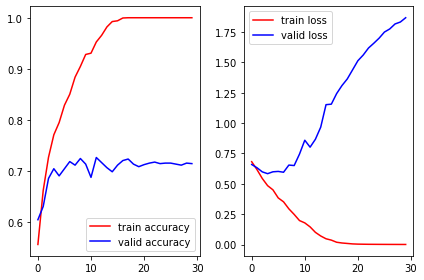

In [11]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='r', label='train accuracy')
ax1.plot(valid_acc, color='b', label='valid accuracy')
ax1.legend()

ax2.plot(train_loss, color='r', label='train loss')
ax2.plot(valid_loss, color='b', label='valid loss')
ax2.legend()

plt.tight_layout()
plt.show()

<class 'numpy.ndarray'> (150, 150, 3)
(1, 150, 150, 3)


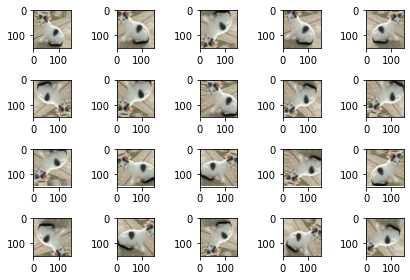

In [15]:
### Image Augmentation(이미지 증식)

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

img = image.load_img('../data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)
print(type(x), x.shape)

x = x.reshape((1,) + x.shape)
print(x.shape)

figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))
    
idx = 0
for batch in datagen.flow(x, batch_size=1):
    ax[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx == 20:
        break

plt.tight_layout()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)       147584    
____________________________________

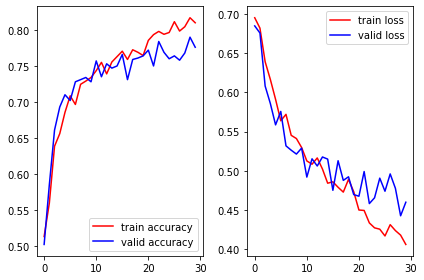

In [16]:
####################  이미지  ####################
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_small/train'              # cats 폴더, dogs 폴더
valid_dir = '../data/cat_dog_small/validation'         # 

# ImageDataGenerator를 생성해요!
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


####################  model 생성  ####################
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()

##################################################  1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'
                ))


##################################################  3
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'
                ))

model.add(MaxPooling2D(pool_size=(2,2)))


##################################################  4
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'
                ))

model.add(MaxPooling2D(pool_size=(2,2)))



### feature extraction ###

model.add(Flatten())   #  4차원 데이터를 2차원으로!

model.add(Dense(units=256,            # hidden layer 넣어줘버리기~
                activation='relu'))

model.add(Dense(units=1,                # output layer 넣어줘버리기~
                activation='sigmoid'))  # 확률값 알아야하니까 sigmoid

print(model.summary())   # model 정보 요약해서 봐보자


####################  optimizer 설정  ####################
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,   # train_generator 요기에 있는 데이터로 학습하겠어!!
                                       # 2000의 이미지를 20개씩 다 뽑으려면, 100번을 뽑아야함
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)   # 1000의 이미지를 20개씩 다 뽑으려면, 50번을 뽑아야함

model.save('../data/cats_dogs_small_cnn_model_augmentation.h5')


####################  그래프 그리기  ####################
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='r', label='train accuracy')
ax1.plot(valid_acc, color='b', label='valid accuracy')
ax1.legend()

ax2.plot(train_loss, color='r', label='train loss')
ax2.plot(valid_loss, color='b', label='valid loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [22]:
### Transfer Learning

# Keras는 전이학습을 위해서 VGG16을 제공해줌
from tensorflow.keras.applications import VGG16

model_base = VGG16(weights='imagenet',
                   include_top=False,             
                   input_shape=(150,150,3))

print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [25]:
## 우리가 가지고 있는 데이터(개와 고양이)를 VGG16에 통과시켜서
## activation map을 만듬
## ndarray형태로 저장!

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '../data/cat_dog_small/'
train_dir = os.path.join(base_dir, 'train')  #../data/cat_dog_small/train
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1/255)

def extraction_feature(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,))
    
    generator = datagen.flow_from_directory(
        directory,
        classes=['cats','dogs'],
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'
    )
    
    i=0
    
    for x_data_batch, t_data_batch in generator:
        feature_batch = model_base.predict(x_data_batch)  # 20개 이미지 특성추출
        features[i*20:(i+1)*20] = feature_batch
        labels[i*20:(i+1)*20] = t_data_batch
        
        i = i+1
        if i*20 >= sample_count:
            break
            
    return features, labels
        
    
    

train_features, train_labels = extraction_feature(train_dir, 2000)
valid_features, valid_labels = extraction_feature(valid_dir, 1000)
test_features, test_labels = extraction_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
## 이 activation map을 이용해서 DNN 학습

train_x_data = np.reshape(train_features,(2000, 4*4*512))  # 2차원
train_t_data = train_labels

valid_x_data = np.reshape(valid_features,(1000, 4*4*512))  # 2차원
valid_t_data = valid_labels

test_x_data = np.reshape(test_features,(1000, 4*4*512))  # 2차원
test_t_data = test_labels


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Flatten(input_shape=(4*4*512,)))

model.add(Dense(units=256,
                activation='relu'))

model.add(Dropout(rate=0/5))

model.add(Dense(units=1,
               activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x_data,
                    train_t_data,
                    epochs=30,
                    batch_size=20,
                    validation_data=(valid_x_data, valid_t_data))

Epoch 1/30
100/100 [==============================] - 5s 36ms/step - loss: 0.5242 - accuracy: 0.7311 - val_loss: 0.2828 - val_accuracy: 0.8920
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.2153 - accuracy: 0.9178 - val_loss: 0.2511 - val_accuracy: 0.8940
Epoch 3/30
100/100 [==============================] - 3s 28ms/step - loss: 0.1565 - accuracy: 0.9455 - val_loss: 0.2313 - val_accuracy: 0.9020
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.1193 - accuracy: 0.9677 - val_loss: 0.2655 - val_accuracy: 0.8880
Epoch 5/30
100/100 [==============================] - 2s 23ms/step - loss: 0.1112 - accuracy: 0.9614 - val_loss: 0.2327 - val_accuracy: 0.9090
Epoch 6/30
100/100 [==============================] - 2s 25ms/step - loss: 0.0744 - accuracy: 0.9803 - val_loss: 0.2366 - val_accuracy: 0.9040
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.0616 - accuracy: 0.9866 - val_loss: 0.2416 - val_accuracy: 0.8990